#### File I/O

In [2]:
import os

In [61]:
file_name = os.path.join('../data','biostats.csv')
fin = open(file_name,'r')
lines = fin.readlines()
fin.close()
print(len(lines))

20


In [62]:
lines

['"Name",     "Sex", "Age", "Height (in)", "Weight (lbs)"\n',
 '"Alex",       "M",   41,       74,      170\n',
 '"Bert",       "M",   42,       68,      166\n',
 '"Carl",       "M",   32,       70,      155\n',
 '"Dave",       "M",   39,       72,      167\n',
 '"Elly",       "F",   30,       66,      124\n',
 '"Fran",       "F",   33,       66,      115\n',
 '"Gwen",       "F",   26,       64,      121\n',
 '"Hank",       "M",   30,       71,      158\n',
 '"Ivan",       "M",   53,       72,      175\n',
 '"Jake",       "M",   32,       69,      143\n',
 '"Kate",       "F",   47,       69,      139\n',
 '"Luke",       "M",   34,       72,      163\n',
 '"Myra",       "F",   23,       62,       98\n',
 '"Neil",       "M",   36,       75,      160\n',
 '"Omar",       "M",   38,       70,      145\n',
 '"Page",       "F",   31,       67,      135\n',
 '"Quin",       "M",   29,       71,      176\n',
 '"Ruth",       "F",   28,       65,      131\n',
 '\n']

<div style="color:blue">
  <h2>Types of files used</h2>
</div>


In this course we'll look at the following file types:
- plain text
- delimiter-separated values (CSV, TSV)
- binary
- pickled
- Panda's frames, hdf5, Matlab mat files, etc ...
- XML, YMAL, JSON


<div style="color:orange">
  <h3>Plain Text Files</h3>
</div>

Data can be stored in plain text files with arbitrary delimiters (space, tabs, commas). Data does not need to be organized into an equal number of elements per "record" or line. Plain text files (also CSV files) are structured as a set of lines terminated by end of line characters, '\n'. 
We don't need to import any libraries to start working with files. The following functions are used frequently:
<ul>
    <li> <b>open()</b>. This created a file object (handle) that makes the files contents accessible to the program. A file can be opened in different modes. The default mode is "read" ('r'). Other modes are "write" ('w'), "append" ('a'), "read binary" ('rb'), "write binary" ('wb'), and "read and write" ('r+') </li>
     <li> <b> close() </b>. This function closes the access to the file. If you forget to issue this command Python will take care of the garbage collection and close the stream. It's however strongly encouraged to close the stream yourself when you're done reading the necessary data. </li>
    <li> <b> read()</b>. This function reads the contents of the file as one (huge) string. You can also specify the number of characters to read by passing that number to the function.</li>
   <li> <b> read(n) </b>. This reads $n$ bytes from the file. </li>
     <li> <b>readline()</b>. This functions reads the contents of a file one line at a time as a string. Remember that lines are terminated by a the end of line character '\n'. </li>
     <li><b>readlines()</b>. This function reads the whole file as a list of lines as strings. </li>
    <li> <b>write()</b>: writes one string at a time to the file. </li>
    <li> <b>seek(offset, initial location or refernce point)</b>:  moves the pointer by the specified offset from the initial location. The initial location or the reference point can take on 3 values: 0 - the beginning of the file,  1 - the current location, 2 - the end of the file.</li>
    <li> <b> tell() </b>: tell the location of the pointer in the file. </li>
 </ul>

<div style="color:orange">
  <h4>Examples</h4>
</div>

In [32]:
# read the whole file into one string

import os

fname = os.path.join('../data', 'text.txt')

with open(fname, 'r') as fin:
    data = fin.read()
    
data

'123456789#\n123456789!\n123456789*\n123456789-\n'

In [3]:
print(data)

123456789#
123456789!
123456789*
123456789-



In [31]:
# read only one line

import os

fname = os.path.join('../data', 'text.txt')

with open(fname, 'r') as fin:
    data = fin.readline()
    
data

'123456789#\n'

In [34]:
# read the whole file putting each line as an element of a list

import os

fname = os.path.join('../data', 'text.txt')

with open(fname, 'rb') as fin:
    data = fin.readlines()
    
data

[b'123456789#\n', b'123456789!\n', b'123456789*\n', b'123456789-\n']

In [35]:
fin = open(fname, 'rb')

In [36]:
# read 10 bytes
characters = fin.read(10)
characters
print('the first 10 bytes:', characters)

the first 10 bytes: b'123456789#'


In [29]:
fin.close()

In [37]:
characters = fin.read(3)
print( [ord(x) for x in characters.decode('utf-8')])

[10, 49, 50]


In [38]:
# read the next 10 bytes - recall that the end of line characted is counted as 
# part of the string
characters = fin.read(10)
print('the second 10 bytes', characters)
ord_list = [ord(x) for x in characters.decode('utf-8')]
print('length of list is: ', len(ord_list))
print('list is ', ord_list)

the second 10 bytes b'3456789!\n1'
length of list is:  10
list is  [51, 52, 53, 54, 55, 56, 57, 33, 10, 49]


In [39]:
# the pointer's location after reading 20 bytes
print('the pointer is at poistion ', fin.tell())

the pointer is at poistion  23


In [40]:
# read the next byte
print('the 24tht byte is ', fin.read(1))

the 24tht byte is  b'2'


In [41]:
# move to the beginning of the file by using the seek function
# fin.seek(offset, from_location)
# from_location: 0 - from beginning of the file (default), 1 - from current location, 2 - from the end of the file
fin.seek(0,0)

0

In [42]:
# skip 20 bytes (charactes) and read the one right after
print('after seeking to the beginning of the file we are at location:', fin.tell())
fin.seek(20, 0)
print('the 20th byte is:', fin.read(2))

after seeking to the beginning of the file we are at location: 0
the 20th byte is: b'!\n'


In [43]:
# skip the first 3 bytes from the beginning of the file
fin.seek(3, 0)
print('i am @ ', fin.tell())

i am @  3


In [44]:
# read the 4th byte
print('the 4th byte is ', fin.read(1))
print('we are @ : ', fin.tell())

the 4th byte is  b'4'
we are @ :  4


In [45]:
# skip 10 byte from this location
fin.seek(10, 1)

14

In [110]:
# get the current location and the character there
print('we are at ', fin.tell())
print(fin.read(1))

we are at  33
b'1'


In [111]:
# read the rest of the file from this point on and print it
print('the rest of the file is:\n', fin.read())

the rest of the file is:
 b'23456789-\n'


In [46]:
# read the last 3 bytes before the end of the file
fin.seek(3, 2)
print(fin.read())

b''


In [115]:
# read a byte now that we've reached the end of the file
print ('the charachter at the end of the file is ', fin.read())

the charachter at the end of the file is  b''


In [47]:
# close the file
fin.close()

In [48]:
# now let's read one line at a time

# open an existing  file for reading
file_name = os.path.join('../data', 'text.txt')
fin = open(file_name, 'r')

# read the first line
first_line = fin.readline()
print (first_line)

# read the second line
second_line = fin.readline()
print (second_line)

# close file
fin.close()

123456789#

123456789!



In [50]:
# note: when readline() is called, a line is read and the "pointer" is 
# moved to the next line within the file; reading is done sequentially. 
# So if you want the third line you have to go through the first two and ignoring them.

# open an existing  file for reading
file_name = os.path.join('../data', 'text.txt')
fin = open(file_name, 'r')

# read the first and second lines and ignore them - this can go in a loop if you like
line = fin.readline()
line = fin.readline()

# read the third line
line = fin.readline()
print(line)

# close the file
fin.close()

123456789*



In [55]:
# read the whole file as a list contating each line as an element


# open an existing  file for reading
file_name = os.path.join('../data', 'text.txt')
fin = open(file_name, 'r')

# read the file as a list and close
data = fin.readlines()
fin.close()


# show the list - notice the end of line character in each element
print(data)

['123456789#\n', '123456789!\n', '123456789*\n', '123456789-\n']


In [53]:
# loop though the list and print the lines - the EOL character will be printed as a 
# new line so in the addition to the new line provided by the print statement we also 
# get one from  the string itself
for line in data:
    print(line)

123456789#

123456789!

123456789*

123456789-



In [54]:
# loop though the list and print the lines without the extra EOL charachter
for line in data:
    print(line.strip())

123456789#
123456789!
123456789*
123456789-


In [56]:
# write some data to a file - if the file does not exit then it gets created 
# otherwise it gets overwritten
out_file = os.path.join('../data', 'out_file.txt')
test_out = open(out_file, 'w')

In [57]:
# define a string
str1 = 'my first line'
str2 = 'my second line'

# write the strings
test_out.write(str1)
test_out.write(str2)

# close the file
test_out.close()

In [61]:
# if you open the file you'd see that the lines are written back to back with out 
# an EOL character - to avoid this ammend a EOL to the string
out_file = os.path.join('../data', 'out_file.txt')
test_out = open(out_file, 'w')

# define a string
str1 = 'my first line\n'
str2 = 'my second line'

# write the strings
test_out.write(str1)
test_out.write(str2)

# close the file
test_out.close()

In [62]:
# another way to write the two lines
out_file = os.path.join('../data', 'out_file.txt')
test_out = open(out_file, 'w')

# define a string
str1 = 'my first line'
str2 = 'my second line'

# write the strings
test_out.write(str1 + '\n' +  str2)

# close the file
test_out.close()

In [63]:
# append a line to the file
out_file = os.path.join('../data', 'out_file.txt')
test_out = open(out_file, 'a')

# define a string
str1 = '\nmy 3rd line\n'
str2 = 'my 4th line'

# write the strings
test_out.write(str1 + str2)

# close the file
test_out.close()

In [65]:
# another way to open and parse a file is by using the "with" keyword. the 
# advanatage of this is that it handles file closing automatically.

with open(out_file, 'r') as fin:
    read_data = fin.readlines()

    
# no closing the file as we did above
print(read_data)

for line in read_data:
    print(line.strip().split())

['my first line\n', 'my second line\n', 'my 3rd line\n', 'my 4th line']
['my', 'first', 'line']
['my', 'second', 'line']
['my', '3rd', 'line']
['my', '4th', 'line']


In [66]:
import numpy as np

In [68]:
a = np.random.random((5,6))
print(a)

[[0.443315   0.96386641 0.85825369 0.16917963 0.81913416 0.7917213 ]
 [0.7760544  0.64266206 0.50859818 0.65923928 0.30833132 0.65333752]
 [0.76614967 0.75117934 0.24237863 0.71138239 0.09302684 0.56457157]
 [0.67780532 0.53052629 0.30389401 0.11096203 0.11377424 0.98269711]
 [0.64976596 0.6915638  0.110446   0.39515411 0.37488874 0.78526763]]


In [69]:
b = np.random.random((5,6))
print(b)

[[0.42532083 0.34450876 0.73417515 0.92191868 0.89248913 0.66529536]
 [0.671274   0.27279276 0.13819074 0.22402548 0.34340479 0.25288581]
 [0.29790701 0.66010878 0.66714369 0.34641219 0.37864825 0.19551951]
 [0.30960839 0.91328512 0.69050164 0.71573098 0.36798072 0.07387047]
 [0.5001808  0.56718176 0.31150387 0.36042948 0.54647662 0.65668862]]


In [70]:
np.savetxt(os.path.join('../data', 'text1.txt'), a)

In [72]:
np.savetxt(os.path.join('../data', 'text2.txt'), (a.ravel(), b.ravel()))

In [73]:
np.savetxt(os.path.join('../data', 'text3.txt'), b, fmt='%1.4e')

In [74]:
# Save an array to a binary file in NumPy .npy format.
np.save(os.path.join('../data', 'text4'), a)

In [135]:
np.load(os.path.join('../data', 'text4.npy'))

array([[0.49062066, 0.29308058, 0.81672147, 0.31531374, 0.64062301,
        0.18647222],
       [0.55015774, 0.56994159, 0.79314859, 0.27729137, 0.00526579,
        0.10484798],
       [0.85755416, 0.63572092, 0.48990852, 0.05964052, 0.65045585,
        0.28134821],
       [0.5392651 , 0.07969306, 0.91282644, 0.18126365, 0.18621101,
        0.82108231],
       [0.45122169, 0.43420012, 0.76881915, 0.51552973, 0.84082082,
        0.53938493]])

In [75]:
# Save several arrays into a single file in uncompressed .npz format
np.savez(os.path.join('../data', 'text5'), a,b)

In [77]:
tempf = np.load(os.path.join('../data', 'text5.npz'))

In [78]:
tempf.files

['arr_0', 'arr_1']

In [87]:
# Save several arrays into a single file in uncompressed .npz format
np.savez(os.path.join('../data', 'text6'), a=a,b=b)#, avg=a, std=b)

In [88]:
npzfile = np.load(os.path.join('../data', 'text6.npz'))

In [89]:
npzfile.files

['a', 'b']

In [90]:
npzfile['a']

array([[0.443315  , 0.96386641, 0.85825369, 0.16917963, 0.81913416,
        0.7917213 ],
       [0.7760544 , 0.64266206, 0.50859818, 0.65923928, 0.30833132,
        0.65333752],
       [0.76614967, 0.75117934, 0.24237863, 0.71138239, 0.09302684,
        0.56457157],
       [0.67780532, 0.53052629, 0.30389401, 0.11096203, 0.11377424,
        0.98269711],
       [0.64976596, 0.6915638 , 0.110446  , 0.39515411, 0.37488874,
        0.78526763]])

In [91]:
npzfile['b']

array([[0.42532083, 0.34450876, 0.73417515, 0.92191868, 0.89248913,
        0.66529536],
       [0.671274  , 0.27279276, 0.13819074, 0.22402548, 0.34340479,
        0.25288581],
       [0.29790701, 0.66010878, 0.66714369, 0.34641219, 0.37864825,
        0.19551951],
       [0.30960839, 0.91328512, 0.69050164, 0.71573098, 0.36798072,
        0.07387047],
       [0.5001808 , 0.56718176, 0.31150387, 0.36042948, 0.54647662,
        0.65668862]])

In [85]:
npzfile['arr_1']

array([[0.42532083, 0.34450876, 0.73417515, 0.92191868, 0.89248913,
        0.66529536],
       [0.671274  , 0.27279276, 0.13819074, 0.22402548, 0.34340479,
        0.25288581],
       [0.29790701, 0.66010878, 0.66714369, 0.34641219, 0.37864825,
        0.19551951],
       [0.30960839, 0.91328512, 0.69050164, 0.71573098, 0.36798072,
        0.07387047],
       [0.5001808 , 0.56718176, 0.31150387, 0.36042948, 0.54647662,
        0.65668862]])

In [86]:
npzfile['arr_0']

array([[0.443315  , 0.96386641, 0.85825369, 0.16917963, 0.81913416,
        0.7917213 ],
       [0.7760544 , 0.64266206, 0.50859818, 0.65923928, 0.30833132,
        0.65333752],
       [0.76614967, 0.75117934, 0.24237863, 0.71138239, 0.09302684,
        0.56457157],
       [0.67780532, 0.53052629, 0.30389401, 0.11096203, 0.11377424,
        0.98269711],
       [0.64976596, 0.6915638 , 0.110446  , 0.39515411, 0.37488874,
        0.78526763]])

In [92]:
# Save several arrays into a single file in uncompressed .npz format
np.savez(os.path.join('../data', 'text7'), b=b, c=a+b)

In [93]:
npzfile = np.load(os.path.join('../data', 'text7.npz'))

In [94]:
npzfile.files

['b', 'c']

In [95]:
npzfile['c']

array([[0.86863584, 1.30837517, 1.59242884, 1.09109832, 1.71162329,
        1.45701666],
       [1.44732841, 0.91545482, 0.64678892, 0.88326476, 0.65173611,
        0.90622333],
       [1.06405668, 1.41128812, 0.90952232, 1.05779458, 0.47167509,
        0.76009109],
       [0.98741371, 1.44381141, 0.99439565, 0.82669301, 0.48175496,
        1.05656758],
       [1.14994676, 1.25874557, 0.42194988, 0.75558359, 0.92136535,
        1.44195625]])

In [96]:
# Save several arrays into a single file in uncompressed .npz format
np.savez_compressed(os.path.join('../data', 'text8'), b=b, c=a+b)

In [97]:
npzfile = np.load(os.path.join('../data', 'text8.npz'))

In [98]:
npzfile.files

['b', 'c']

In [153]:
import os.path
file_name = os.path.join('../data', 'bindata.bin')

In [155]:
import numpy as np
fin = open(file_name, 'rb')
data = np.fromfile(fin,dtype=np.float32,count=5)
for num in data:
    print ('%d' %num)


524288
6
75155
424
90000


In [157]:
data2 = np.fromfile(fin,dtype=np.float32,count=6)
print (data2)
type(data2)

[0.042 0.25  0.5   0.75  0.958 1.   ]


numpy.ndarray

In [158]:
data3= np.fromfile(fin,dtype=np.float32,count=4)

for num in data3:
    print ('%e' %num )

7.620000e-02
7.620000e-02
1.270000e-02
2.000000e-05


In [159]:
data4 = np.fromfile(fin,dtype=np.float32,count=-1)
print (data4)
print (len(data4))
fin.close()

[ 4305.8076  3249.1045  3187.3145 ... 35298.53   37785.555  38536.098 ]
3145728


In [161]:
with open(file_name, "rb") as fin:
    fin.seek(4)
    ncols = int(np.fromfile(fin, dtype=np.float32, count = 1))
    print ('Num Cols: ', int(ncols))
    
    #go back to the beginning of the file
    fin.seek(0)
    
    pfluc_dtype = np.dtype([
       ("N", np.float32),
       ("ncols", np.float32),
       ("Q", np.float32),
       ("U", np.float32),
       ("fs", np.float32),
       #array with ncols
       ("x", (np.float32, (ncols))),
       ("L", np.float32),
       ("W", np.float32),
       ("D", np.float32),
       ("pRef", np.float32)
       #
       ])
    data = np.fromfile(fin, dtype=pfluc_dtype, count =1)
    
    print('Data read using "np.fromfile": ')
    print('N', pfluc_dtype.fields['N'], ': ', data['N'])
    print('ncols', pfluc_dtype.fields['ncols'], ': ', data['ncols'])
    print('Q', pfluc_dtype.fields['Q'], ': ', data['Q'])
    print('U', pfluc_dtype.fields['U'], ': ', data['U'])
    print('fs', pfluc_dtype.fields['fs'], ': ', data['fs'])
    print('x', pfluc_dtype.fields['x'], ': ', data['x'])
    print('L', pfluc_dtype.fields['L'], ': ', data['L'])
    print('W', pfluc_dtype.fields['W'], ': ', data['W'])
    print('D', pfluc_dtype.fields['D'], ': ', data['D'])
    print('p Ref', pfluc_dtype.fields['pRef'], ': ', data['pRef'])

Num Cols:  6
Data read using "np.fromfile": 
N (dtype('float32'), 0) :  [524288.]
ncols (dtype('float32'), 4) :  [6.]
Q (dtype('float32'), 8) :  [75155.29]
U (dtype('float32'), 12) :  [424.68735]
fs (dtype('float32'), 16) :  [90000.]
x (dtype(('<f4', (6,))), 20) :  [[0.042 0.25  0.5   0.75  0.958 1.   ]]
L (dtype('float32'), 44) :  [0.0762]
W (dtype('float32'), 48) :  [0.0762]
D (dtype('float32'), 52) :  [0.0127]
p Ref (dtype('float32'), 56) :  [2.e-05]


In [162]:
%matplotlib notebook

<IPython.core.display.Javascript object>


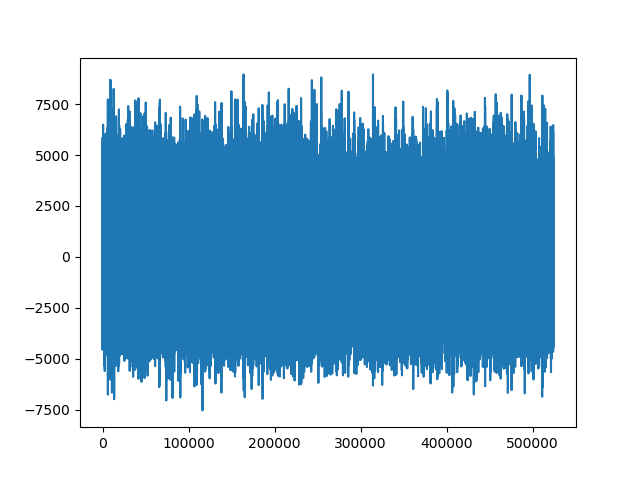

In [163]:
import matplotlib.pyplot as plt
plt.plot(data4[0:int(data['N'])])

<IPython.core.display.Javascript object>


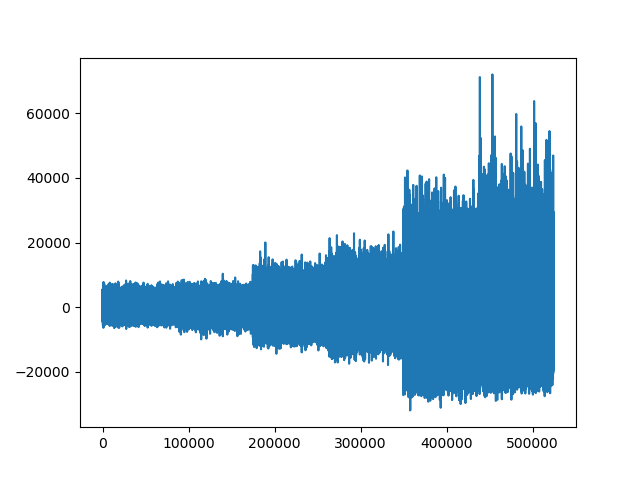

In [164]:
plt.plot(data4[::6])

In [165]:
a=np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [166]:
a.tofile(os.path.join('../data', 'text9.txt'), sep=",")

In [167]:
np.fromstring('0 1 2 3 4 5 6 7 8 9 10', dtype=int, sep=' ')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [194]:
np.frombuffer(b'\x01\x02\x03\x04\x05', dtype=np.uint8, count=3)

array([1, 2, 3], dtype=uint8)

In [171]:
np.fromstring('1, 2', dtype=int, sep=',')

array([1, 2])

In [172]:
a = np.array([1, 2])

In [173]:
 a.tolist()

[1, 2]

In [174]:
a = np.array([[1, 2], [3, 4]])

In [175]:
list(a)

[array([1, 2]), array([3, 4])]

In [176]:
a.tolist()

[[1, 2], [3, 4]]

In [101]:
fname = os.path.join('../data', 'file.txt')

In [114]:
a = np.genfromtxt(fname, 
                  dtype=int, 
                  comments='#',
                  delimiter=',', 
                  skip_header=1, 
                  filling_values=-300)

In [115]:
a

array([[   1,    2,    3,    4,    5,    6],
       [   3,    5,    6, -300,    2,    3],
       [   1,    2,    3,    4,    5,    6]])

In [105]:
a = np.genfromtxt(fname,
                  comments='#',
                  delimiter=',',
                  skip_header=1,
                  missing_values='N/A')

In [186]:
a

array([[ 1.,  2.,  3.,  4.,  5.,  6.],
       [ 3.,  5.,  6., nan,  2.,  3.],
       [ 1.,  2.,  3.,  4.,  5.,  6.]])

In [111]:
a = np.genfromtxt(fname, 
                  dtype=int,
                  comments='#',
                  delimiter=',',
                  skip_header=1,
                  missing_values=1)

In [112]:
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 3,  5,  6, -1,  2,  3],
       [ 1,  2,  3,  4,  5,  6]])

In [189]:
a=np.arange(10)
np.mean(a)

4.5

In [190]:
a.tofile(os.path.join('../data', 'text9.txt'), sep=",")

<div style="color:orange">
  <h2>CSV files</h2>
</div>

CSV files are popular since they can be open in a spreadsheet or a text editor. They are organized in a table format. Here we'll work with rectangular csv files (no data missing) and later we'll work with general text files where some data is missing, data and comments are mixed together, where headers are part of the file to let the user know what kind of data he/she is processing. 

CSV file access functions
<ul>
<li> csv.reader</li>
<li> csv.writer</li>
<li> csv.DictReader </li>
<li> csv.DictWriter</li>
<li> csv.register_dialect</li>
<li> csv.unregister_dialect</li>
<li> csv.get_dialect</li>
<li> csv.list_dialects</li>
<li> csv.field_size_limit</li>
</ul>

In [113]:
# create a csv file the old fashioned way (just like another text file)


# file name - look for it in the data folder
import os
import csv
csv_file = os.path.join('../data', 'csv_file.csv')

# define lines
line1 = 'a,b,c,d,e\n'
line2 = 'f,g,h,i,j\n'
line3 = 'h,i,j,k,l'

# write the data
with open(csv_file, 'w') as fout:
    fout.write(line1 + line2 + line3)

In [116]:
# let's read the file
import csv

with open(csv_file, 'r') as fin:
    csv_reader = csv.reader(fin)
    
    for row in csv_reader:
        print (row)

['a', 'b', 'c', 'd', 'e']
['f', 'g', 'h', 'i', 'j']
['h', 'i', 'j', 'k', 'l']


In [118]:
# this shows the difference between reading the file using the previous methods
# we learned above and the csv way
with open(csv_file, 'r') as fin:
    read_data = fin.readlines()

# no closing the file as we did above
print (read_data)

for line in read_data:
    print(line.strip().split(','))

['a,b,c,d,e\n', 'f,g,h,i,j\n', 'h,i,j,k,l']
['a', 'b', 'c', 'd', 'e']
['f', 'g', 'h', 'i', 'j']
['h', 'i', 'j', 'k', 'l']


In [40]:
# as you can we we got one list with each row as a string element. 
# this is not what we want from a csv file. 

In [119]:
# let's read the file and store the data in a list the persists after the file
# is closed
data_list = []
with open(csv_file, 'r') as fin:
    csv_reader = csv.reader(fin)
    
    for row in csv_reader:
        data_list.append(row)

In [120]:
# show the data
print (data_list)

[['a', 'b', 'c', 'd', 'e'], ['f', 'g', 'h', 'i', 'j'], ['h', 'i', 'j', 'k', 'l']]


In [121]:
# here is what we have when we reverse the list - we're going to write 
# this back to another file

for row in reversed(data_list):
    print (row)

['h', 'i', 'j', 'k', 'l']
['f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e']


In [204]:
# let's write the data to a file in reverse order for the list and for each 
# element in the list

import csv
import os

csv_out_file = os.path.join('../data', 'csv_out.csv')

fout = open(csv_out_file, 'w')

csv_writer = csv.writer(fout)

for row in reversed(data_list):
    csv_writer.writerow(row)
    
fout.close()

In [122]:
# here is another example
# creat another file with headers

# file name - look for it in the data folder
csv_file = os.path.join('../data', 'csv_file2.csv')

# for generating random numbers
import random


# define a random 2d array
random_nums = [[str(random.random()) for _ in range(6)] for _ in range(6)]

# generate a string with all the numbers and new line characters
line = 'lon,lat,alt,roll,pitch,yaw\n'
for row in random_nums:
    line += ','.join(row)+'\n'


# strip the last EOL character 
line = line.strip() # line = line[:-1] is another way of doing it   


# write the file
with open(csv_file, 'w') as fout:
    fout.write(line)

In [123]:
# now that we have the file, we can read it in one swoop into a dictionary


import csv

# the csv file we want to read
csv_file = os.path.join('../data', 'csv_file2.csv')


# read the file into a dictionary
fin = open(csv_file, 'r')
csv_data = csv.DictReader(fin, delimiter=',')

# let's see how the structure looks
for line in csv_data:
    print (line)

# close it
fin.close()

OrderedDict([('lon', '0.6032337990678037'), ('lat', '0.5630434464731595'), ('alt', '0.5750468921031975'), ('roll', '0.4174950394438275'), ('pitch', '0.38997762615518616'), ('yaw', '0.8831076470101522')])
OrderedDict([('lon', '0.046592360495912755'), ('lat', '0.8697268471930044'), ('alt', '0.936164151617999'), ('roll', '0.4575820168370913'), ('pitch', '0.23831827724951904'), ('yaw', '0.08689410354294846')])
OrderedDict([('lon', '0.18057744531440623'), ('lat', '0.7226071421635055'), ('alt', '0.7715682577624948'), ('roll', '0.5991830273806562'), ('pitch', '0.9562952199669654'), ('yaw', '0.5449077772530738')])
OrderedDict([('lon', '0.04188570938553249'), ('lat', '0.6043916564470381'), ('alt', '0.5992265060960754'), ('roll', '0.47658229283925146'), ('pitch', '0.37947192675766217'), ('yaw', '0.5458859852558894')])
OrderedDict([('lon', '0.9674652457993431'), ('lat', '0.36048161722339'), ('alt', '0.9212159815010167'), ('roll', '0.9673362981315095'), ('pitch', '0.912351537708859'), ('yaw', '0.3

In [214]:
# as you can see above, the DictReader parsed the file and organized the data 
# into a dictionary per line with the header as the key and the data as the value
# however this data is live, which means it's a pointer to the file only so as soon
# as the file is closed we lose the data
# it also means that once we loop to the structure once we can access the data
# again
# read the file into a dictionary
fin = open(csv_file, 'r')
csv_data = csv.DictReader(fin, delimiter=',')

# let's see how the structure looks
for line in csv_data:
    print (line)
    
# this will give us nothing
for line in csv_data:
    print (line['yaw'])

    
fin.close()

OrderedDict([('lon', '0.5031747278275336'), ('lat', '0.06285700065546163'), ('alt', '0.6667394229661335'), ('roll', '0.35186138002198386'), ('pitch', '0.6765345585523336'), ('yaw', '0.47303978030310034')])
OrderedDict([('lon', '0.4166232600633315'), ('lat', '0.8043700816278916'), ('alt', '0.0388025540438508'), ('roll', '0.9720092138774608'), ('pitch', '0.19284528606660167'), ('yaw', '0.55028012695442')])
OrderedDict([('lon', '0.8850118888506476'), ('lat', '0.36677321791562645'), ('alt', '0.8278766886436468'), ('roll', '0.33041971950294835'), ('pitch', '0.19576986983871536'), ('yaw', '0.7682492890111438')])
OrderedDict([('lon', '0.009318794656375529'), ('lat', '0.7777724359003784'), ('alt', '0.9630923005762769'), ('roll', '0.6936522322368595'), ('pitch', '0.4664075258152265'), ('yaw', '0.5712259230236779')])
OrderedDict([('lon', '0.15169717512734138'), ('lat', '0.421585912793465'), ('alt', '0.4077911209880032'), ('roll', '0.7589989742773241'), ('pitch', '0.24364488643858118'), ('yaw', '

In [124]:
# so to get the data by column, we do this
fin = open(csv_file, 'r')
csv_data = csv.DictReader(fin, delimiter=',')

# let's see how the structure looks
for line in csv_data:
    print (line['lat'])

0.5630434464731595
0.8697268471930044
0.7226071421635055
0.6043916564470381
0.36048161722339
0.9948618054564334


In [125]:
# let's write a csv file with headers using DictWriter

# from above we saw that the structure generated from DictReader was a list
# of dictionaries - so generate a list of dictionaries

import os
import csv

# define the list
rows = []
rows.append({'name': 'mal', 'dob': 2468, 'role': 'captain'})
rows.append({'name': 'zoe', 'dob': 2484, 'role': 'first mate'})
rows.append({'name': 'wash', 'dob': 2468, 'role': 'pilot'})
rows.append({'name': 'inara', 'dob': 2460, 'role': 'companion'})
rows.append({'name': 'jayne', 'dob': 2463, 'role': 'mercenary'})

# define the header
header = ['name', 'dob', 'role']

# open the file
with open(os.path.join('../data','csv_output_2.csv'), 'w') as fout:
    csv_writer = csv.DictWriter(fout, header)
    csv_writer.writeheader()
    csv_writer.writerows(rows)